In [1]:
import sympy as sy 
from sympy import init_printing
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.dpi'] = 500

init_printing() 

# Define hamiltonian

In [2]:
kx=sy.symbols("k_x")
ky=sy.symbols("k_y")
    
def haldane_honeycomb(t1,t2,m,phi):
    k = sy.Matrix([kx, ky])

    a1 = sy.Matrix([sy.sqrt(3) * 0.5, 0.5])
    a2 = sy.Matrix([0, -1])
    a3 = sy.Matrix([-sy.sqrt(3) * 0.5, 0.5])

    b1 = a2 - a3
    b2 = a3 - a1
    b3 = a1 - a2

    sigma0 = sy.Matrix([[1,0],[0,1]])
    sigmax = sy.Matrix([[0, 1], [1, 0]])
    sigmay = sy.Matrix([[0, -1j], [1j, 0]])
    sigmaz = sy.Matrix([[1, 0], [0, -1]])
    
    d0 = 2 * t2 * sy.cos(phi) * (sy.cos(k.dot(b1)) + sy.cos(k.dot(b2)) + sy.cos(k.dot(b3)))
    dx = t1*((sy.cos(k.dot(a1)) + sy.cos(k.dot(a2)) + sy.cos(k.dot(a3))))
    dy = t1*(-sy.sin(k.dot(a1)) - sy.sin(k.dot(a2)) - sy.sin(k.dot(a3)))
    dz = m + 2 * t2 * sy.sin(phi) * (sy.sin(k.dot(b1)) + sy.sin(k.dot(b2)) + sy.sin(k.dot(b3)))
        
    hk = d0 * sigma0 + dx * sigmax + dy * sigmay + dz * sigmaz

    return d0,dx,dy,dz,hk

# Plot the FBZ and Dirac points

In [3]:
K1 = 4*np.pi/3*np.array([1/np.sqrt(3),0], dtype=float)
K2 = 2*np.pi/3*np.array([1/np.sqrt(3),1], dtype=float)
K3 = 4*np.pi/3*np.array([1/np.sqrt(3),1], dtype=float)

kx_max=2*np.pi/(np.sqrt(3))
ky_max=4*np.pi/3

def plot_FBZ():
    plt.plot([0,0], [0,4*np.pi/3], '--k',linewidth=0.5)
    plt.plot([2*np.pi/(np.sqrt(3)),2*np.pi/(np.sqrt(3))], [0,4*np.pi/3], '--k',linewidth=0.5)
    plt.plot([0,2*np.pi/(np.sqrt(3))], [0,0], '--k',linewidth=0.5)
    plt.plot([0,2*np.pi/(np.sqrt(3))], [4*np.pi/3,4*np.pi/3], '--k',linewidth=0.5,label="FBZ")
    plt.plot(K1[0], K1[1], "*b")
    plt.plot(K2[0], K2[1], "*r", label="$K'$")
    plt.plot(K3[0], K3[1], "*b", label="$K$")
    plt.legend()

# Plot the dispersion relation

In [4]:
def Haldane_eigen(t2,m,phi):
    t1=1
    
    d0,dx,dy,dz,ham=haldane_honeycomb(t1,t2,m,phi)
    
    d=sy.sqrt(dx**2+dy**2+dz**2)
    
    Ed=d0-d
    Eu=d0+d
    Nd=sy.sqrt(2*d*(d-dz))
    Nu=sy.sqrt(2*d*(d+dz))
    Psid=1/Nd*sy.Matrix([[dz-d],[dx+1j*dy]])
    Psiu=1/Nu*sy.Matrix([[dz+d],[dx-1j*dy]])
    
    return Ed,Eu,Psid,Psiu

In [5]:
def band_plot(band_id,m,phi,t2,A,B):  
    t1=1
    
    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)

    En_lower=[]
    En_upper=[]
    
    Ed,Eu,Psid,Psiu=Haldane_eigen(t2,m,phi)
    
    Edown=sy.lambdify([kx, ky], Ed, modules=['numpy'])
    Eup=sy.lambdify([kx, ky], Eu, modules=['numpy'])
    
    for kx1 in xmom:
        for ky1 in ymom:
            E_lower,E_upper = Edown(kx1, ky1),Eup(kx1,ky1)
            En_lower.extend([E_lower])
            En_upper.extend([E_upper])

    Energy_lower=np.transpose(np.reshape(En_lower,(len(xmom),len(ymom))))
    Energy_upper=np.transpose(np.reshape(En_upper,(len(xmom),len(ymom))))
    
    if band_id=="l":
        plt.contourf(xmom, ymom, Energy_lower, 1000, cmap='RdBu')
        plt.colorbar(label="$E_l$",ticks=list(np.linspace(np.min(Energy_lower),np.max(Energy_lower),10)))
    elif band_id=="u":
        plt.contourf(xmom, ymom, Energy_upper, 1000, cmap='RdBu')
        plt.colorbar(label="$E_u$",ticks=list(np.linspace(np.min(Energy_upper),np.max(Energy_upper),10)))
    elif band_id=="d":
        plt.contourf(xmom, ymom, Energy_upper-Energy_lower, 1000, cmap='RdBu')
        plt.colorbar(label="$E_d-E_l$",ticks=list(np.linspace(np.min(Energy_upper-Energy_lower),np.max(Energy_upper-Energy_lower),10)))
    plot_FBZ()
    plt.axis("scaled")
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title("$m$="+str(m)+", $\phi$="+str(round(phi,2))+", $t_2$="+str(t2))
    plt.show()

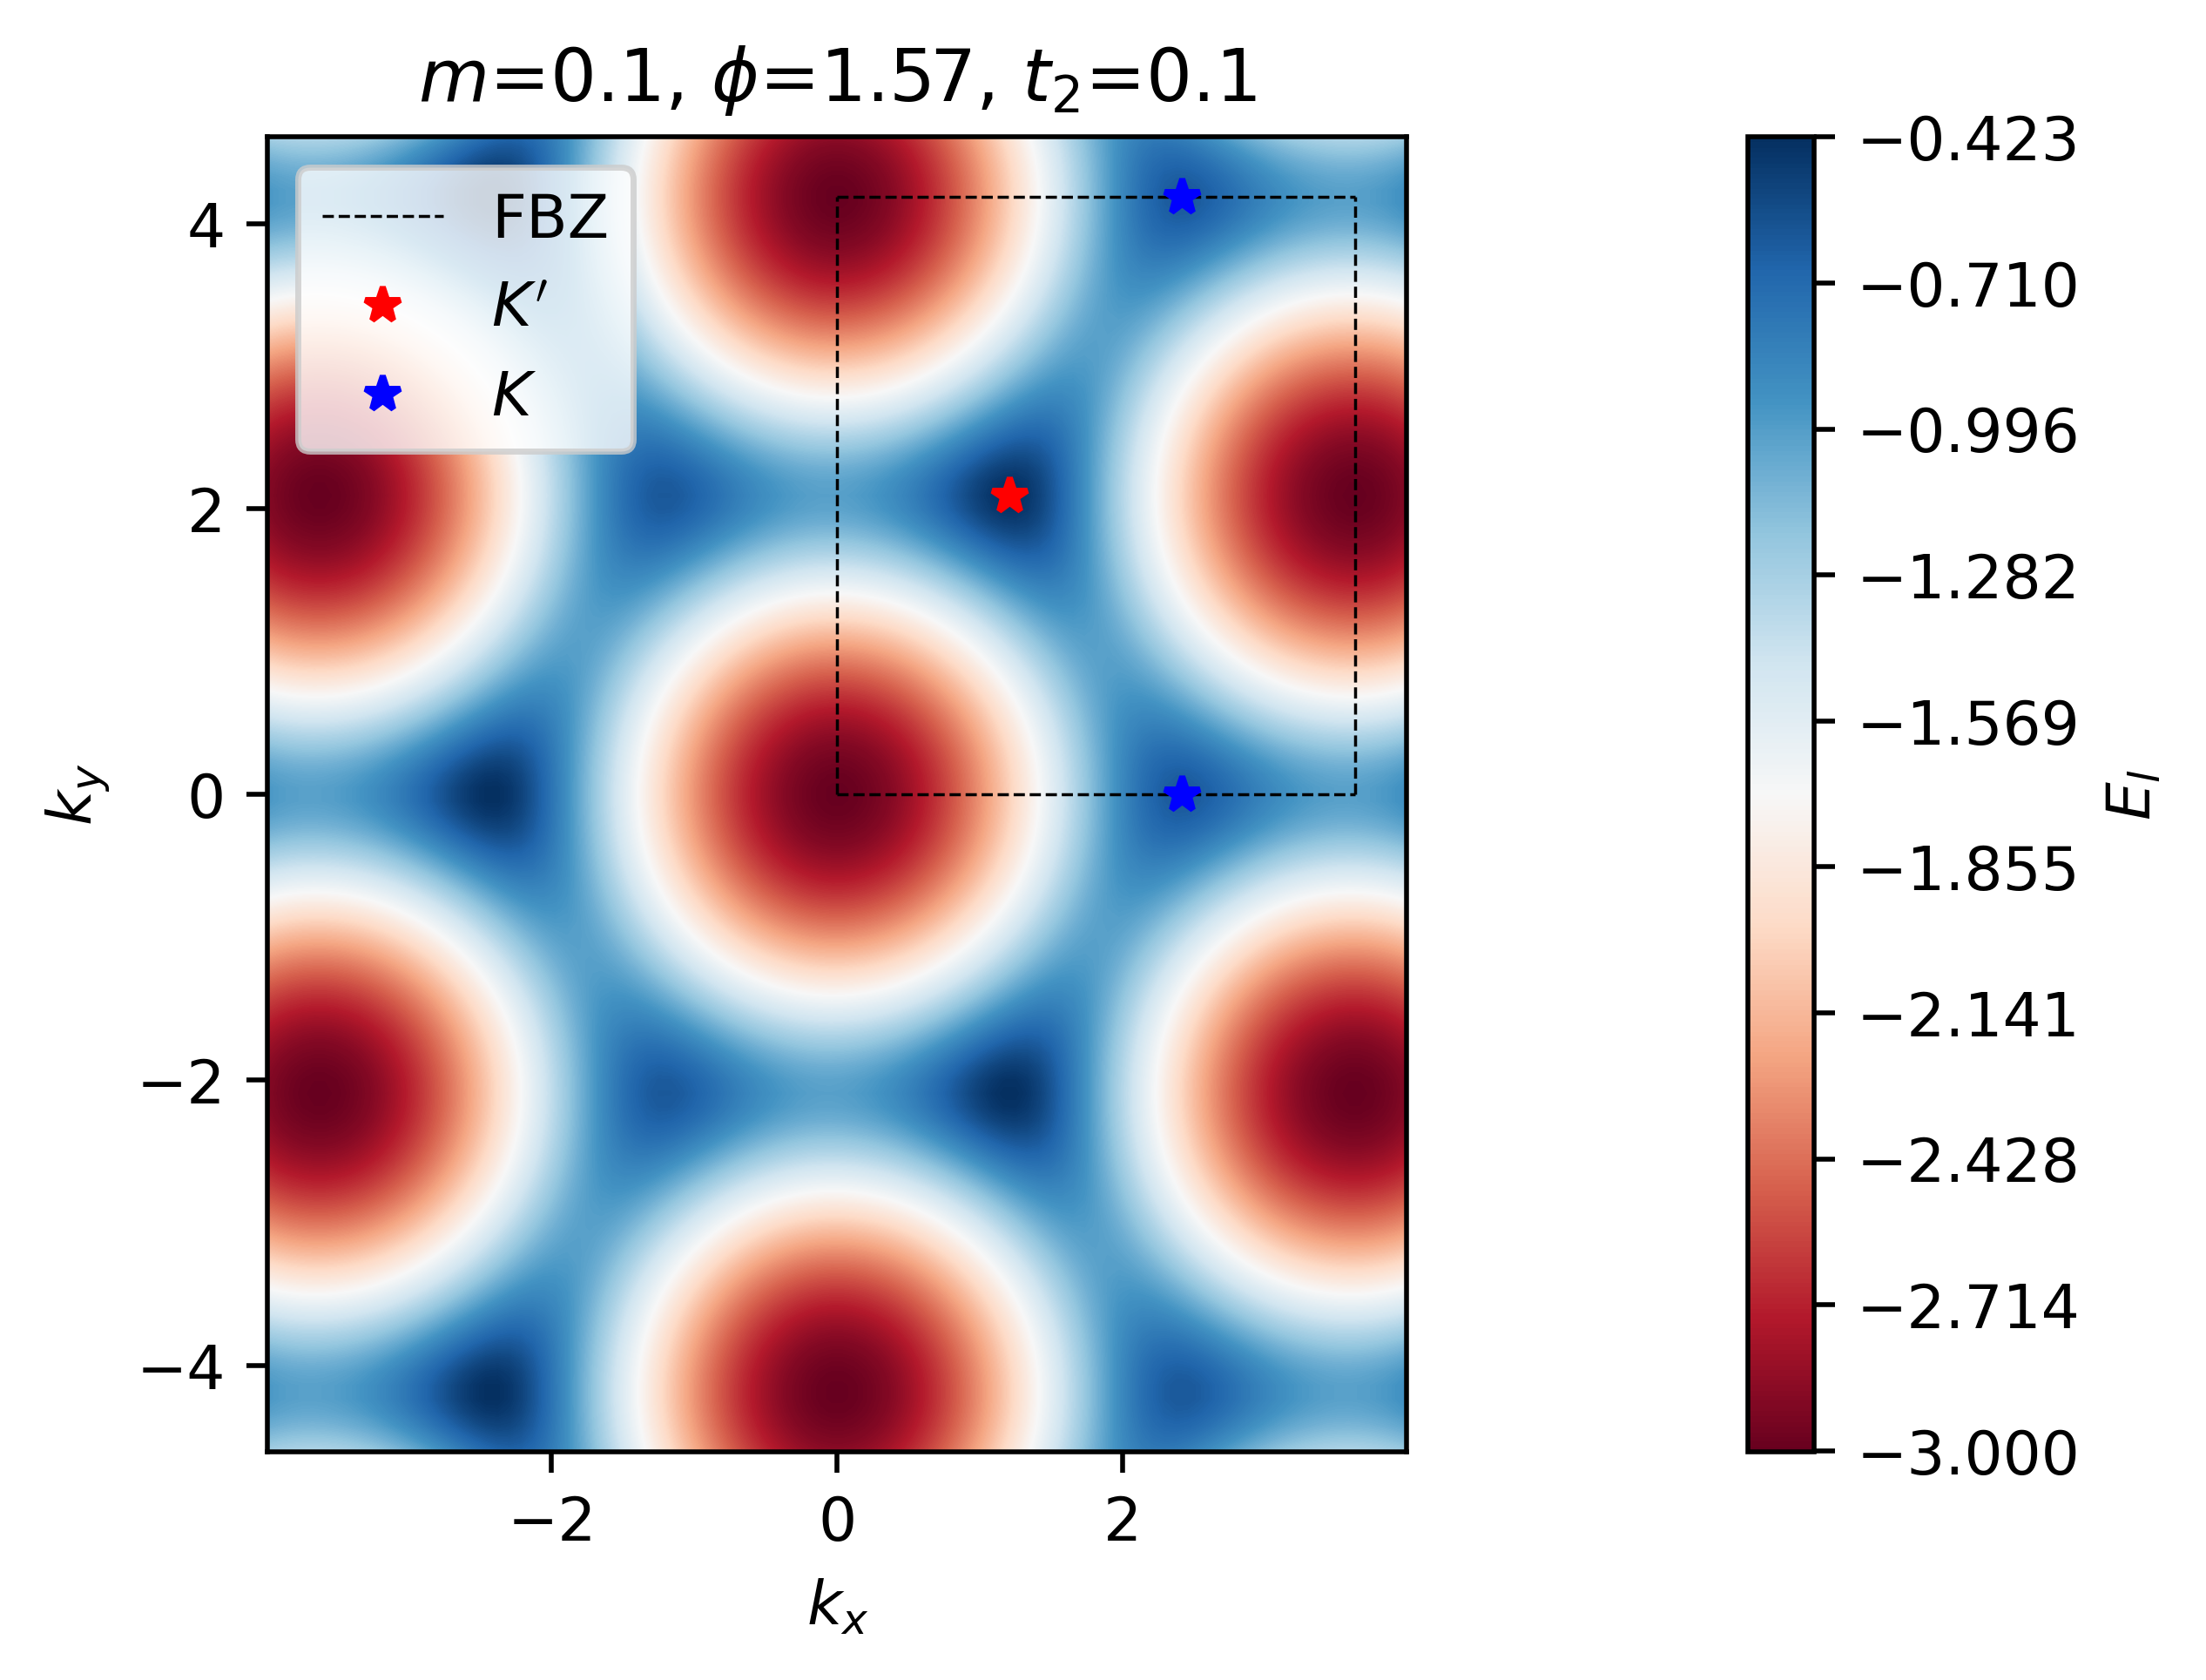

In [6]:
band_plot("l",0.1,np.pi/2,0.1,[-1.1*kx_max,1.1*kx_max],[-1.1*ky_max,1.1*ky_max]) 

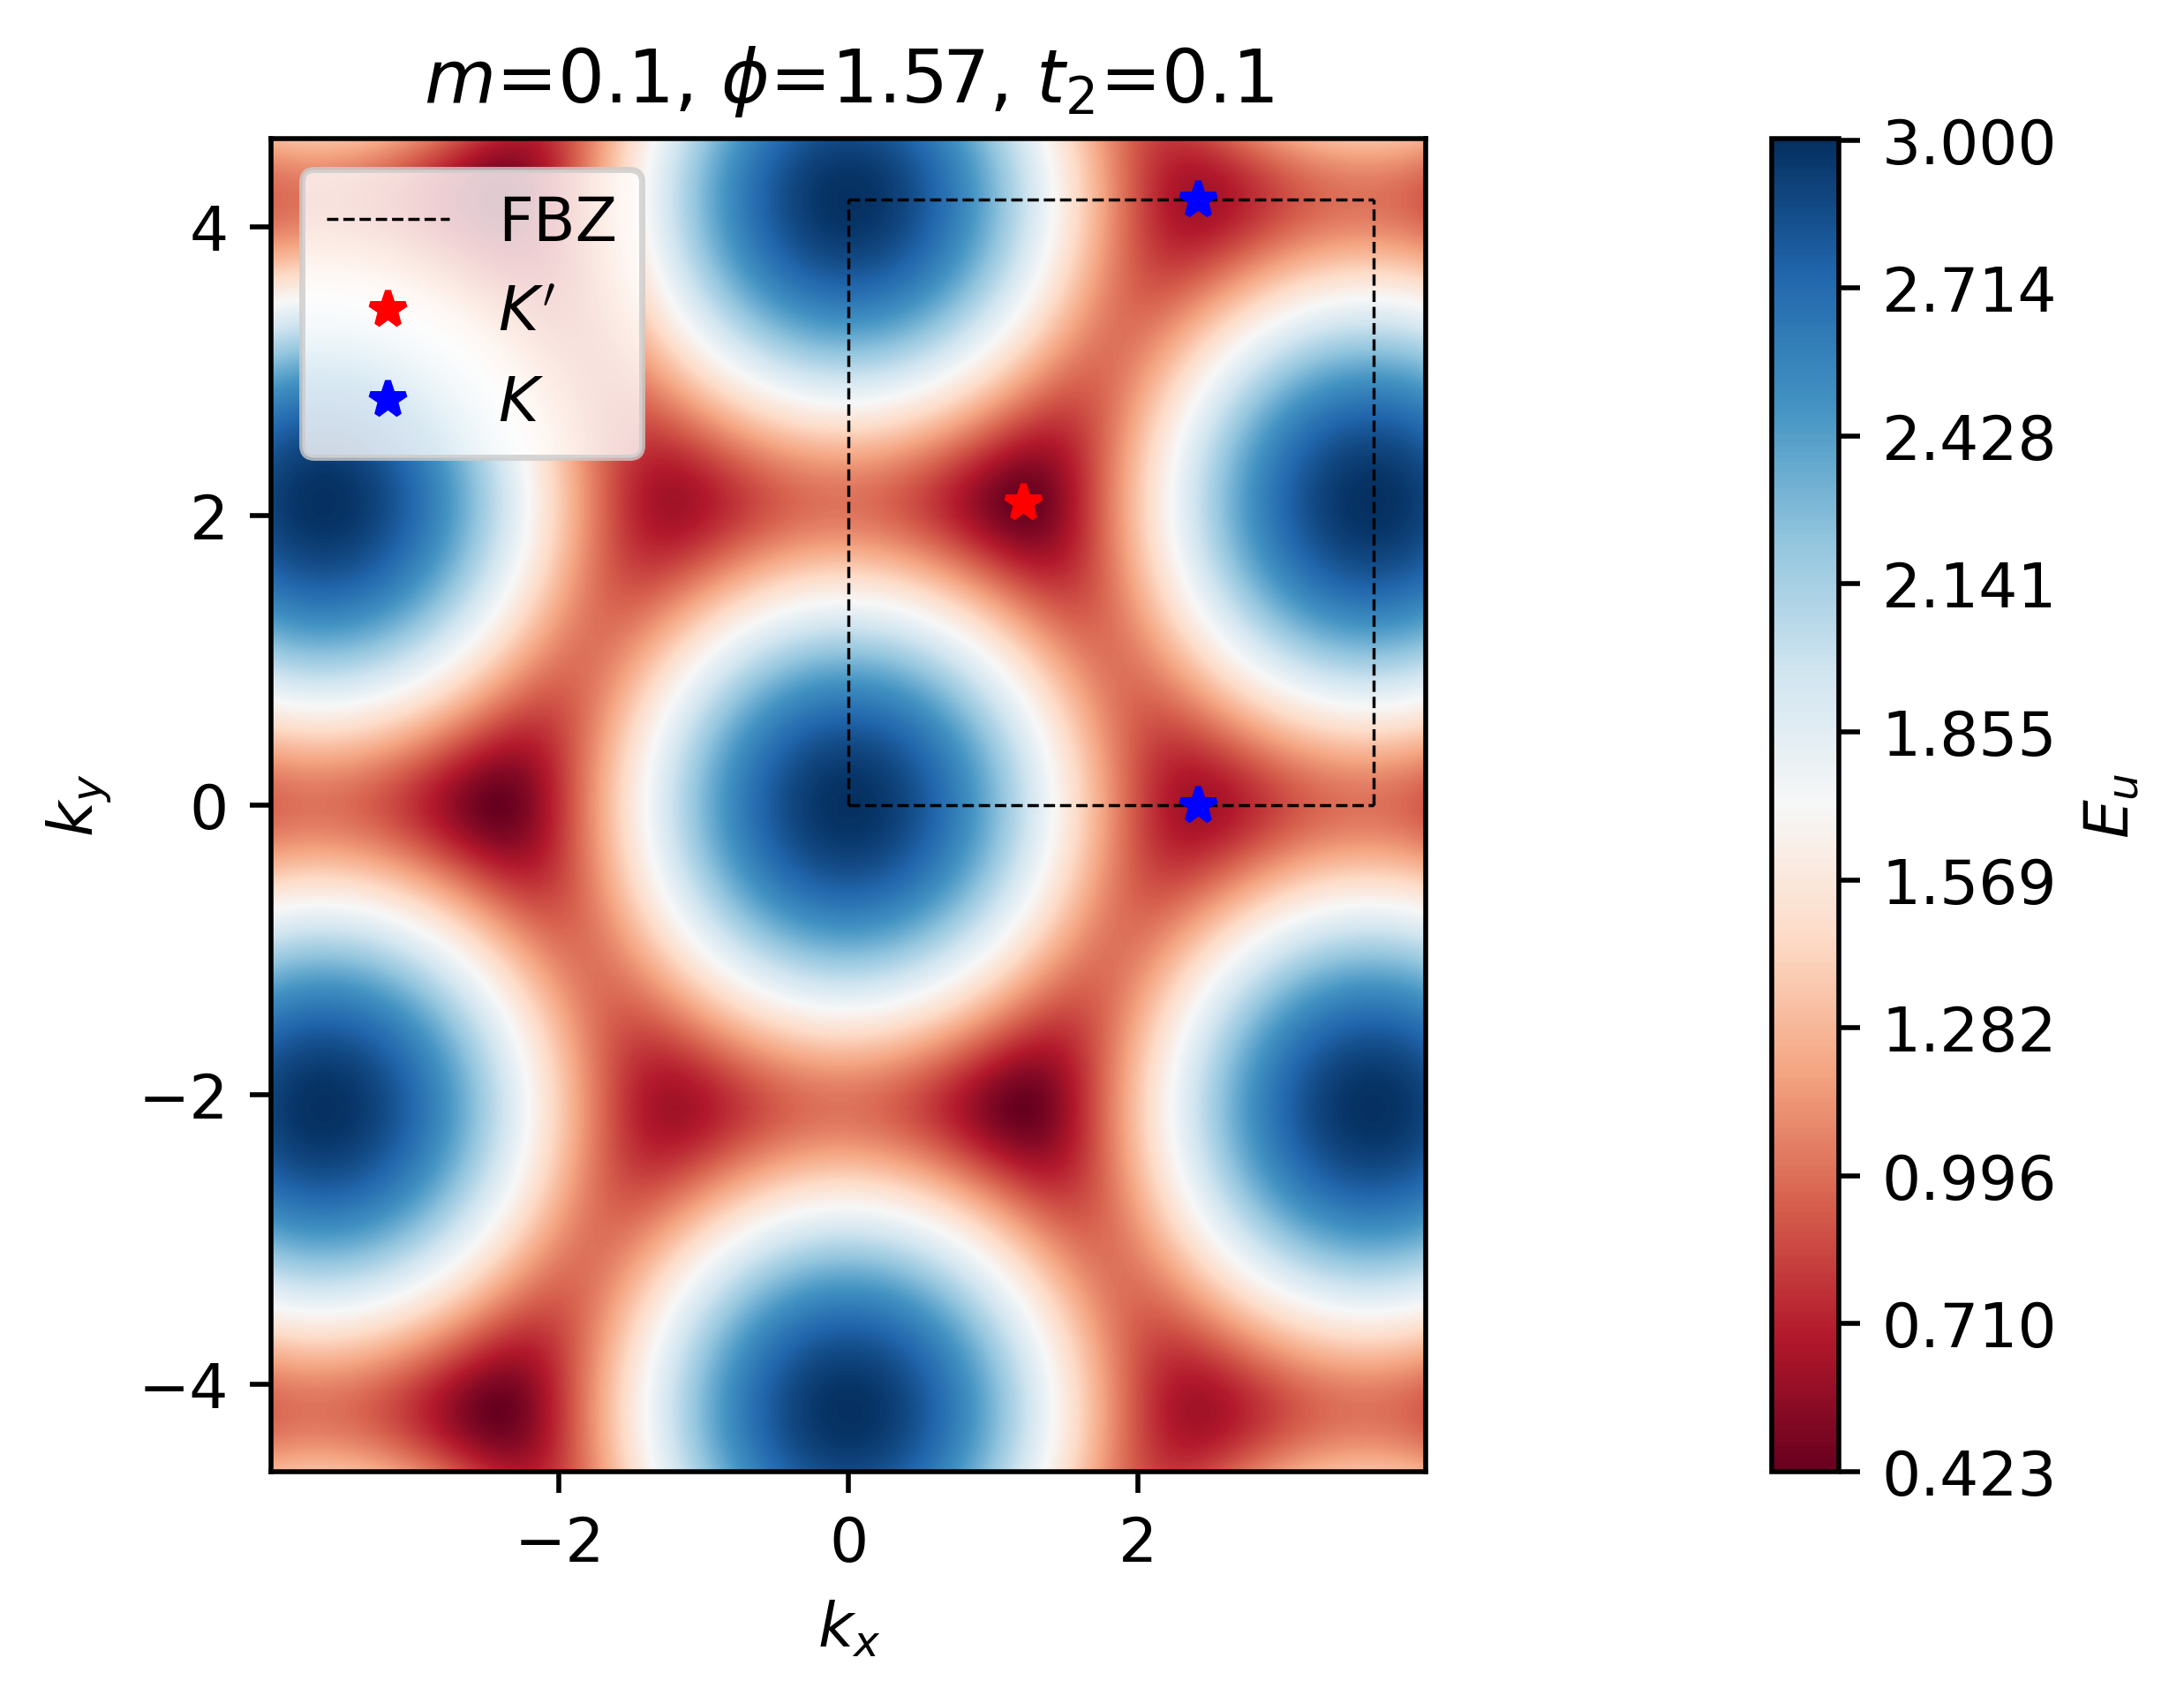

In [7]:
band_plot("u",0.1,np.pi/2,0.1,[-1.1*kx_max,1.1*kx_max],[-1.1*ky_max,1.1*ky_max]) 

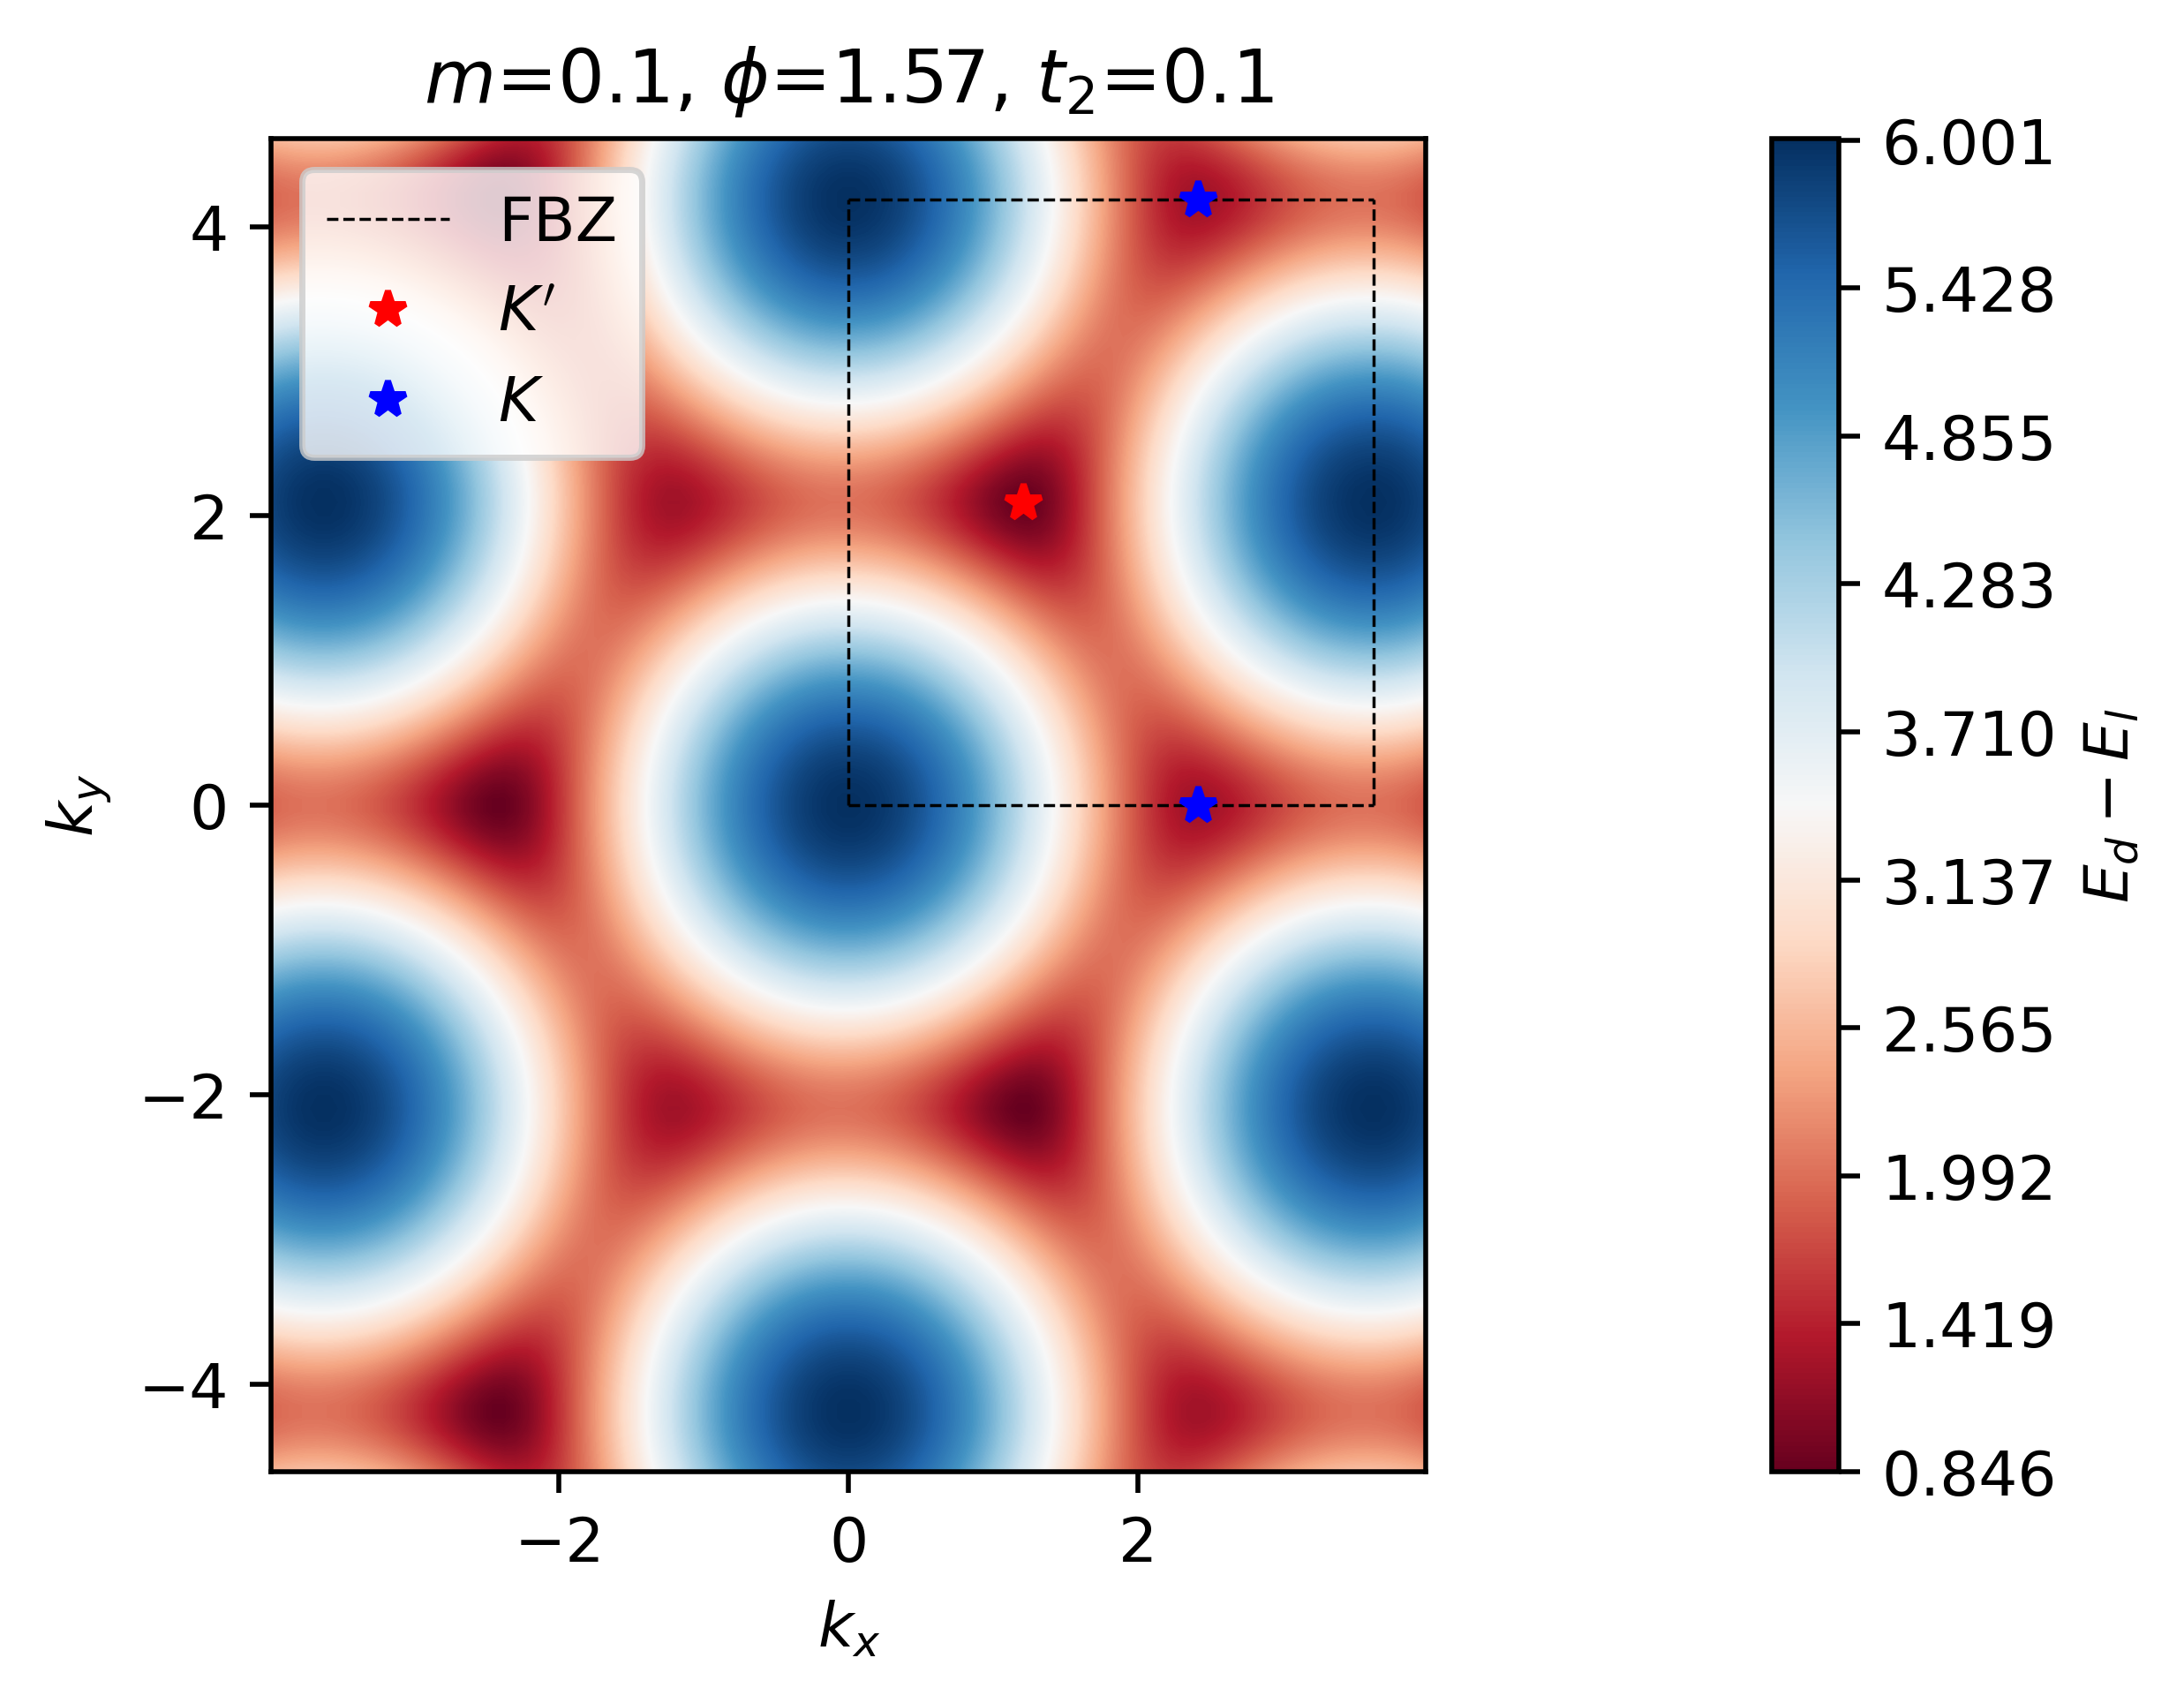

In [8]:
band_plot("d",0.1,np.pi/2,0.1,[-1.1*kx_max,1.1*kx_max],[-1.1*ky_max,1.1*ky_max]) 

# Berry connection

In [9]:
def Berry_conn(Psi):
    xdiffPsi=sy.diff(Psi,kx)
    Bx_conn=sy.conjugate(Psi).dot(xdiffPsi)
    ydiffPsi=sy.diff(Psi,ky)
    By_conn=sy.conjugate(Psi).dot(ydiffPsi)
    return Bx_conn,By_conn

In [10]:
def Berry_connection(m,phi,t2,A,B):
    
    Ed,Eu,Psid,Psiu=Haldane_eigen(t2,m,phi)
    Bxconn,Byconn=Berry_conn(Psid)
    Bxconn=sy.lambdify([kx, ky], Bxconn, modules=['numpy'])
    Byconn=sy.lambdify([kx, ky], Byconn, modules=['numpy'])
    
    Berry_connectionx=[]
    Berry_connectiony=[]

    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)

    for kx1 in xmom:
        for ky1 in ymom:
            Bx = Bxconn(kx1, ky1)
            By = Byconn(kx1, ky1)
            Berry_connectionx.extend([np.abs(Bx)])
            Berry_connectiony.extend([np.abs(By)])
    
    Berry_connectionx=np.transpose(np.reshape(Berry_connectionx,(len(xmom),len(ymom))))
    Berry_connectiony=np.transpose(np.reshape(Berry_connectiony,(len(xmom),len(ymom))))
    return Berry_connectionx,Berry_connectiony

In [11]:
def plot_Berry_connection(component,m,phi,t2,A,B):
    
    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)
    
    Berry_connectionx, Berry_connectiony=Berry_connection(m,phi,t2,A,B)
    
    Berry_connectionx[Berry_connectionx<=1e-7]=1e-7
    Berry_connectiony[Berry_connectiony<=1e-7]=1e-7
    
    if component=="x":
        plt.contourf(xmom, ymom, np.log10(Berry_connectionx), 1000, cmap='plasma')
        plt.colorbar(label="$\log(|A_x|)$")
    elif component=="y":
        plt.contourf(xmom, ymom, np.log10(Berry_connectiony), 1000, cmap='plasma')
        plt.colorbar(label="$\log(|A_y|)$")
    else:
        print("Please insert a suitable input ($x$ or $y$) for the Berry connection component")
    #Berry_connectionx[Berry_connectionx>=2]=0
    #Berry_connectiony[Berry_connectiony>=2]=0
    #plt.quiver(xmom,ymom,Berry_connectionx,Berry_connectiony)
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.axis("scaled")
    plt.title("$m$="+str(m)+", $\phi$="+str(round(phi,2))+", $t_2$="+str(t2))
    plot_FBZ()
    plt.legend()
    plt.show()

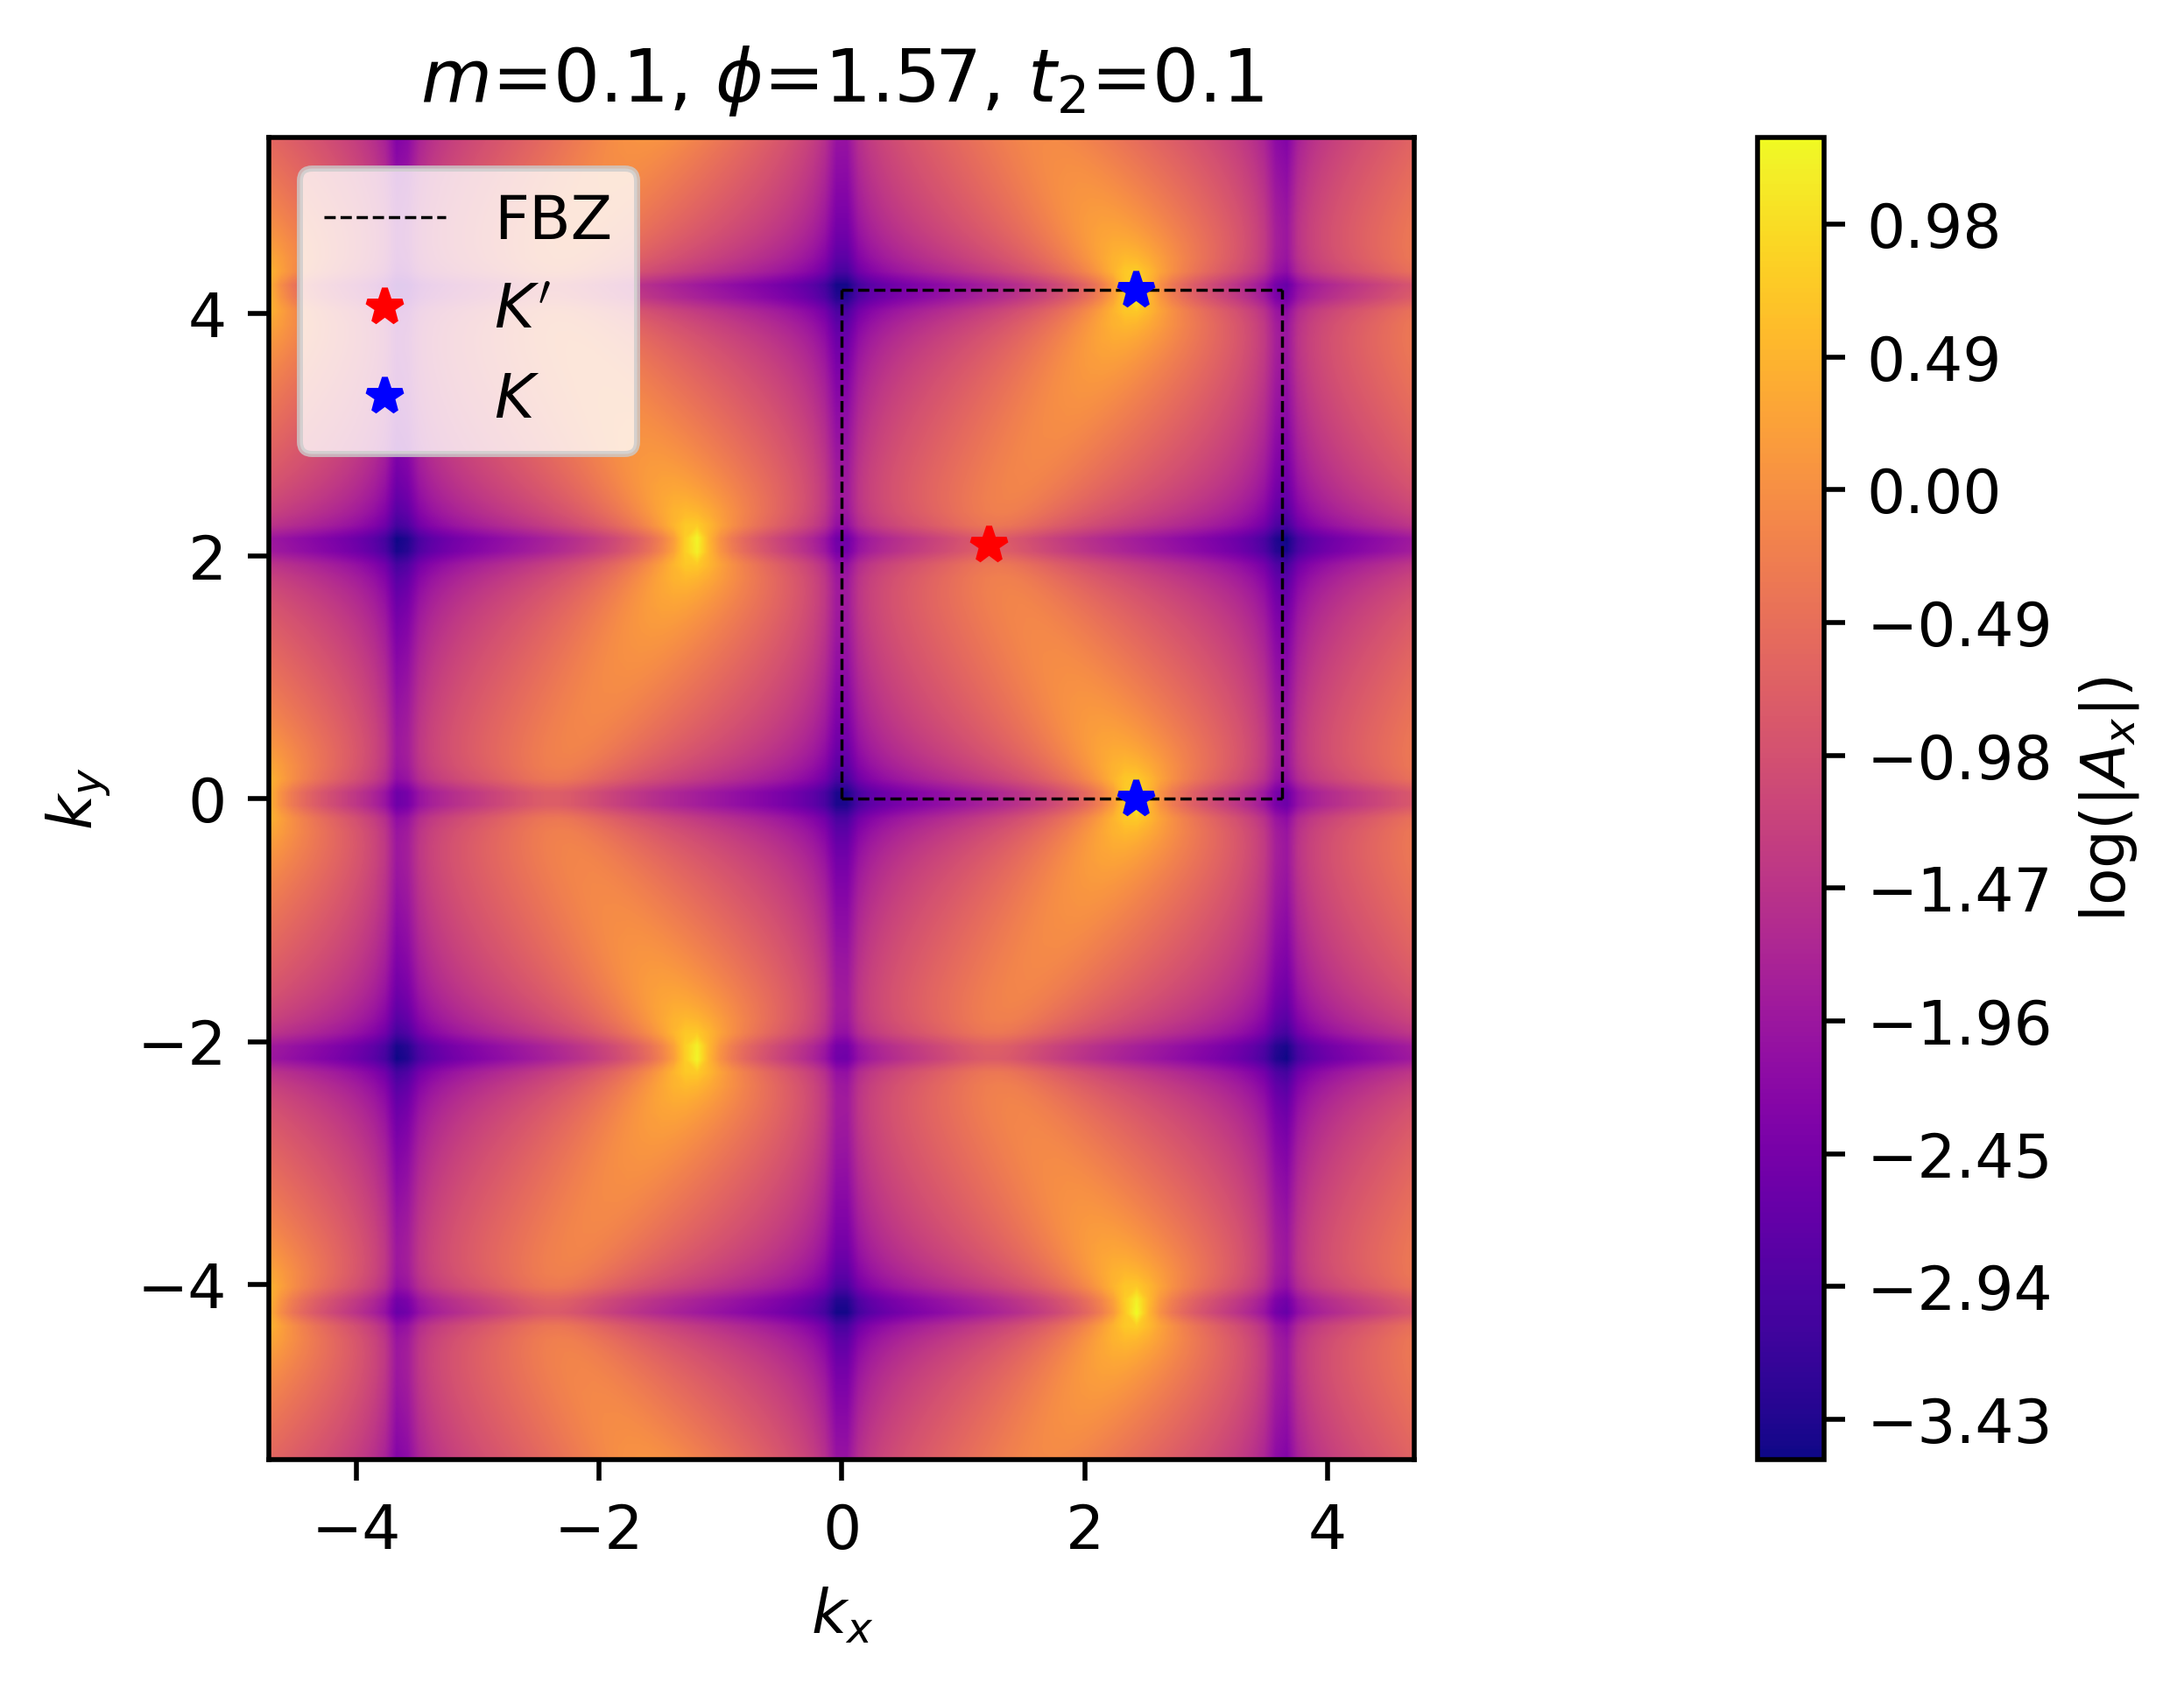

In [12]:
plot_Berry_connection("x",0.1,np.pi/2,0.1,[-1.3*kx_max,1.3*kx_max],[-1.3*ky_max,1.3*ky_max])

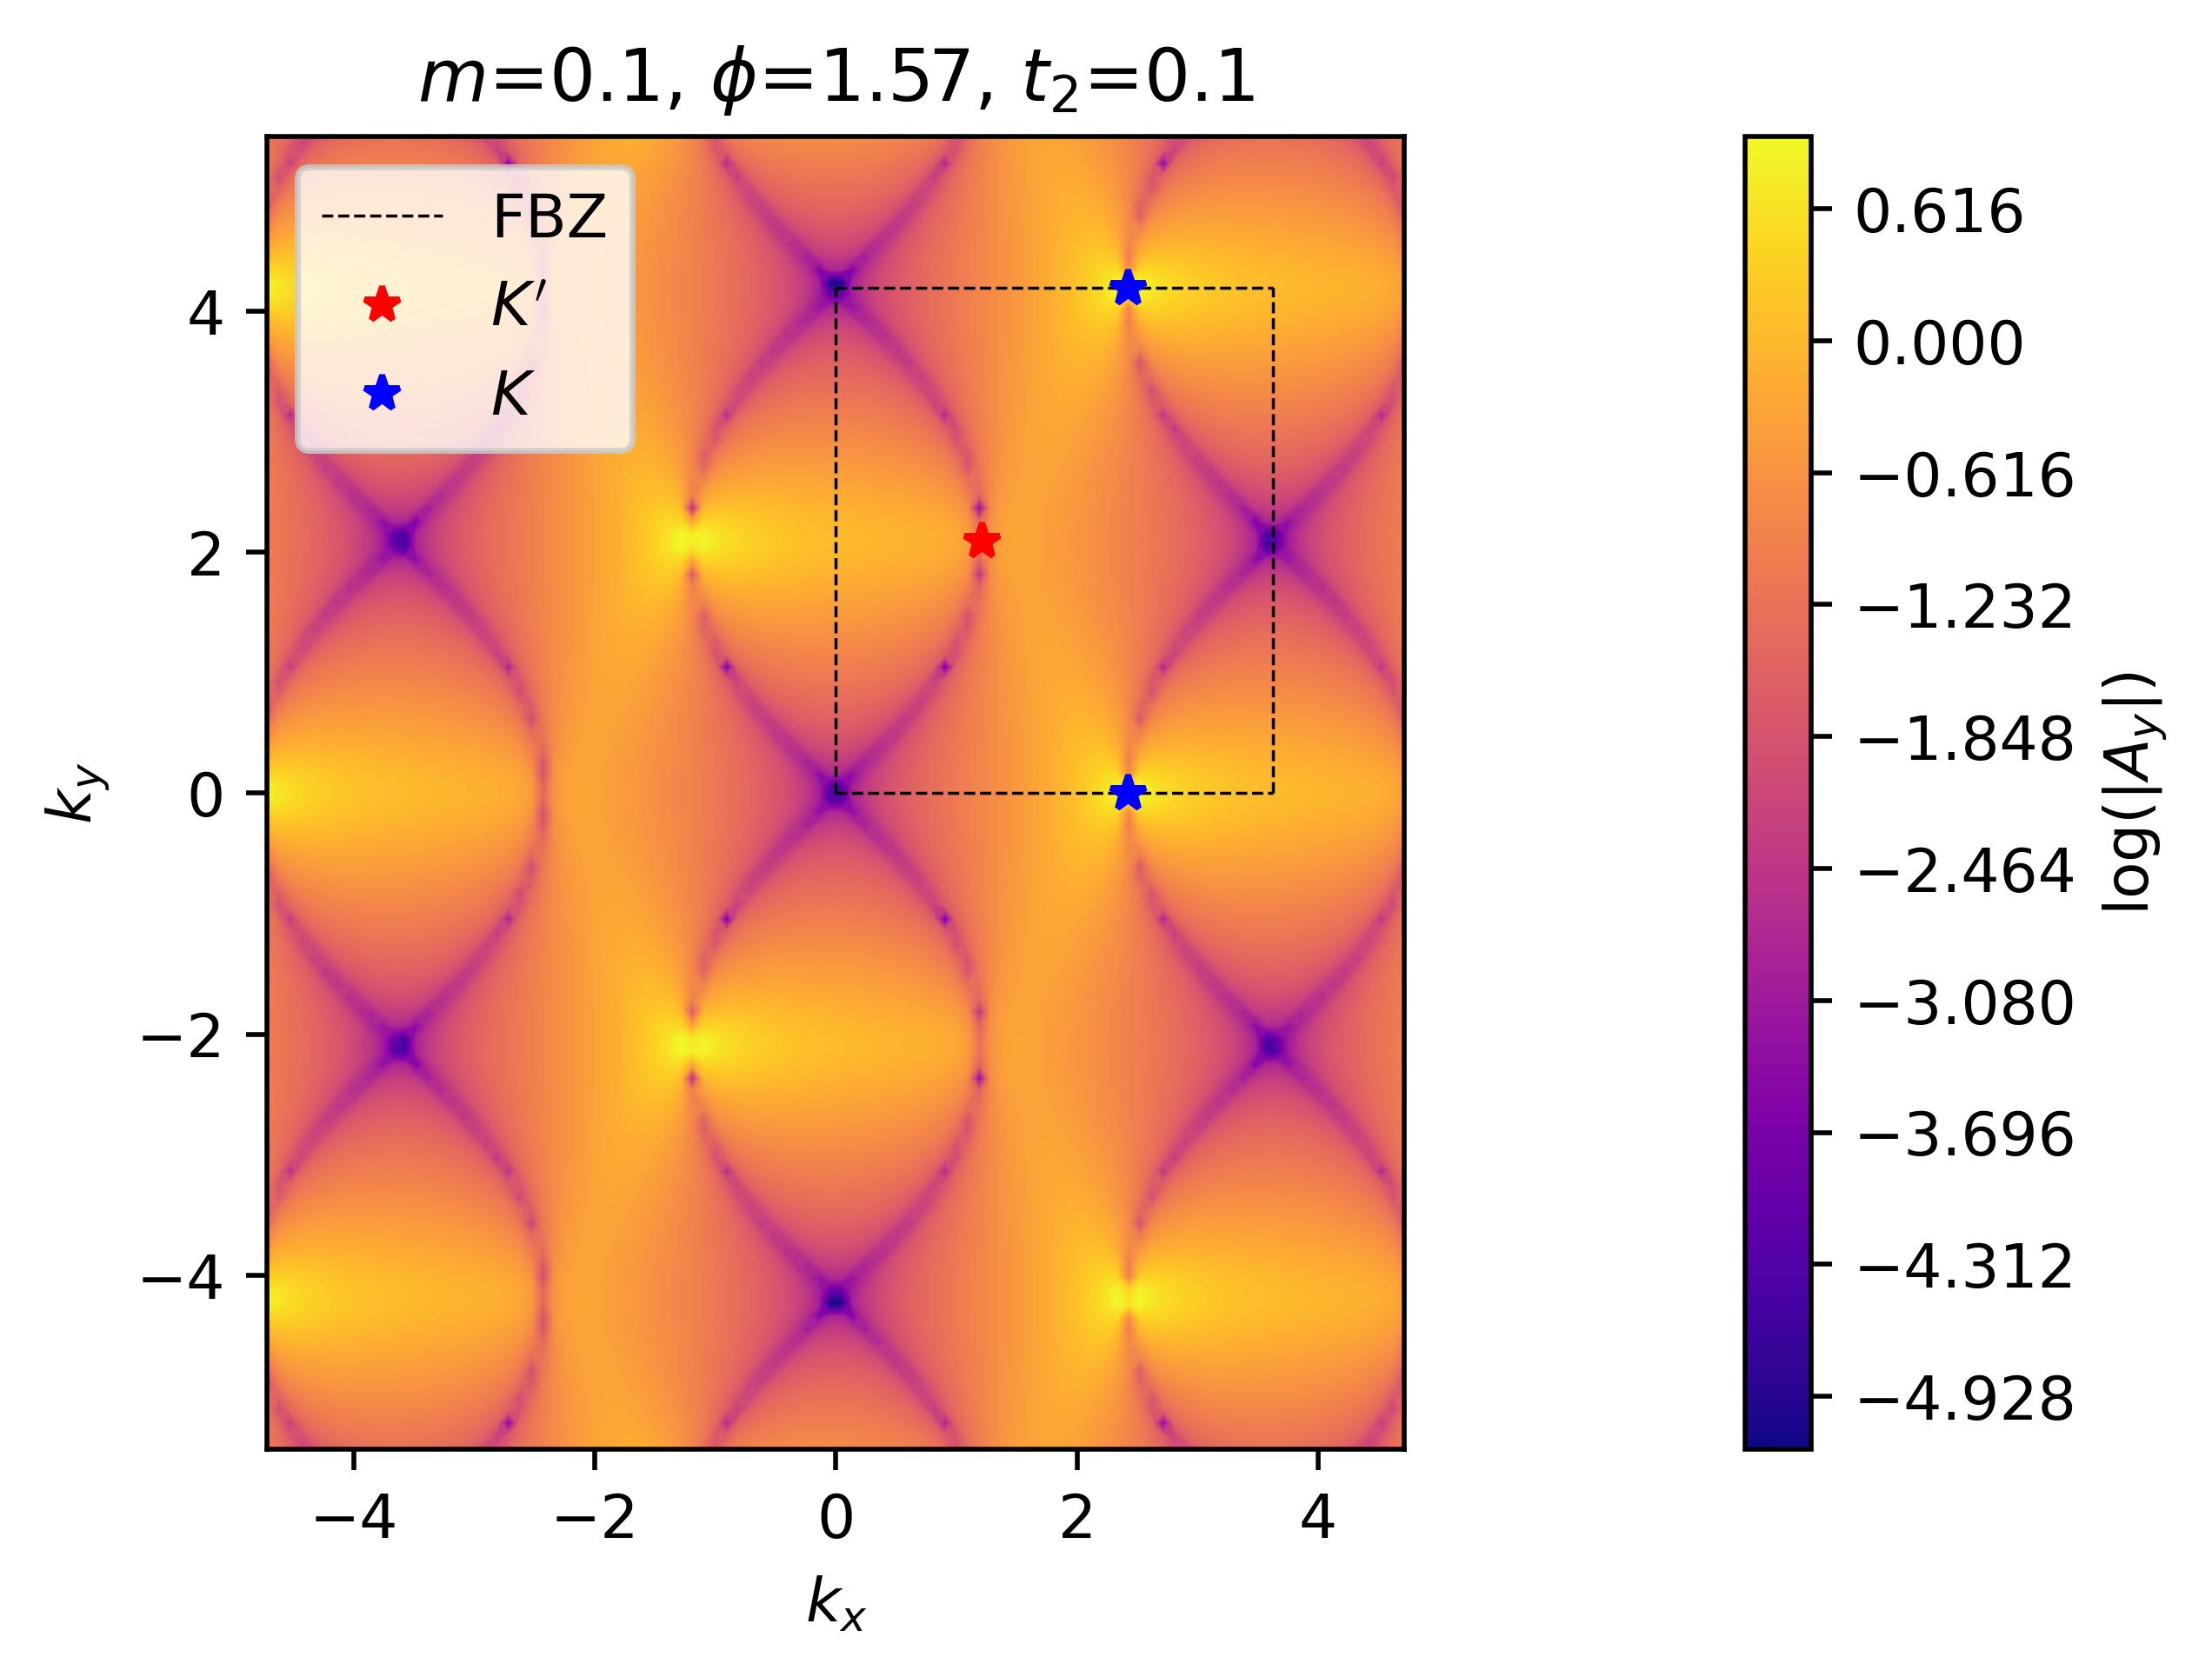

In [13]:
plot_Berry_connection("y",0.1,np.pi/2,0.1,[-1.3*kx_max,1.3*kx_max],[-1.3*ky_max,1.3*ky_max])

# Berry curvature

In [14]:
def diffx(Psi):
    xdiffPsi=sy.diff(Psi,kx)
    return xdiffPsi

In [15]:
def diffy(Psi):
    ydiffPsi=sy.diff(Psi,ky)
    return ydiffPsi

In [16]:
def Berry_curv(Psi):
    return sy.conjugate(diffx(Psi)).dot(diffy(Psi))-sy.conjugate(diffy(Psi)).dot(diffx(Psi))

In [21]:
def plot_Berry_curvature(m,phi,t2,A,B):
    N=(A[1]-A[0])/kx_max*(B[1]-B[0])/ky_max
    Berry_connectionx, Berry_connectiony=Berry_connection(m,phi,t2,A,B)
    Berry_connectionx[Berry_connectionx>=2]=0
    Berry_connectiony[Berry_connectiony>=2]=0

    Ed,Eu,Psid,Psiu=Haldane_eigen(t2,m,phi)
    B_curv=Berry_curv(Psid)
    B_curv=sy.lambdify([kx, ky], B_curv, modules=['numpy'])
    Berry_curvature=[]

    xmom=np.linspace(A[0],A[1],100)
    ymom=np.linspace(B[0],B[1],100)

    for kx1 in xmom:
        for ky1 in ymom:
            B = B_curv(kx1, ky1)
            Berry_curvature.extend([B])

    Berry_curvature=np.transpose(np.reshape(Berry_curvature,(len(xmom),len(ymom))))

    Berry_curvature[np.isnan(Berry_curvature)] = 0 
    Berry_curvature[np.abs(np.imag(Berry_curvature))>=1e2]=0

    plt.contourf(xmom, ymom,np.imag(Berry_curvature), 1000, cmap="RdBu")
    plt.colorbar(label="$Im(\mathcal{F}_{xy})$")
    plt.quiver(xmom,ymom, (Berry_connectionx), (Berry_connectiony))
    plot_FBZ()
    plt.xlabel("$k_x$")
    plt.ylabel("$k_y$")
    plt.title("$m$="+str(m)+", $\phi$="+str(round(phi,2))+", $t_2$="+str(t2))
    plt.legend()
    plt.axis("scaled")
    plt.show()
    
    dkx=(max(xmom)-min(xmom))/len(xmom)
    dky=(max(ymom)-min(ymom))/len(ymom)
    print("The Chern number is:"+str(sum(sum(Berry_curvature))*dkx*dky/(2*np.pi*1j*N)))

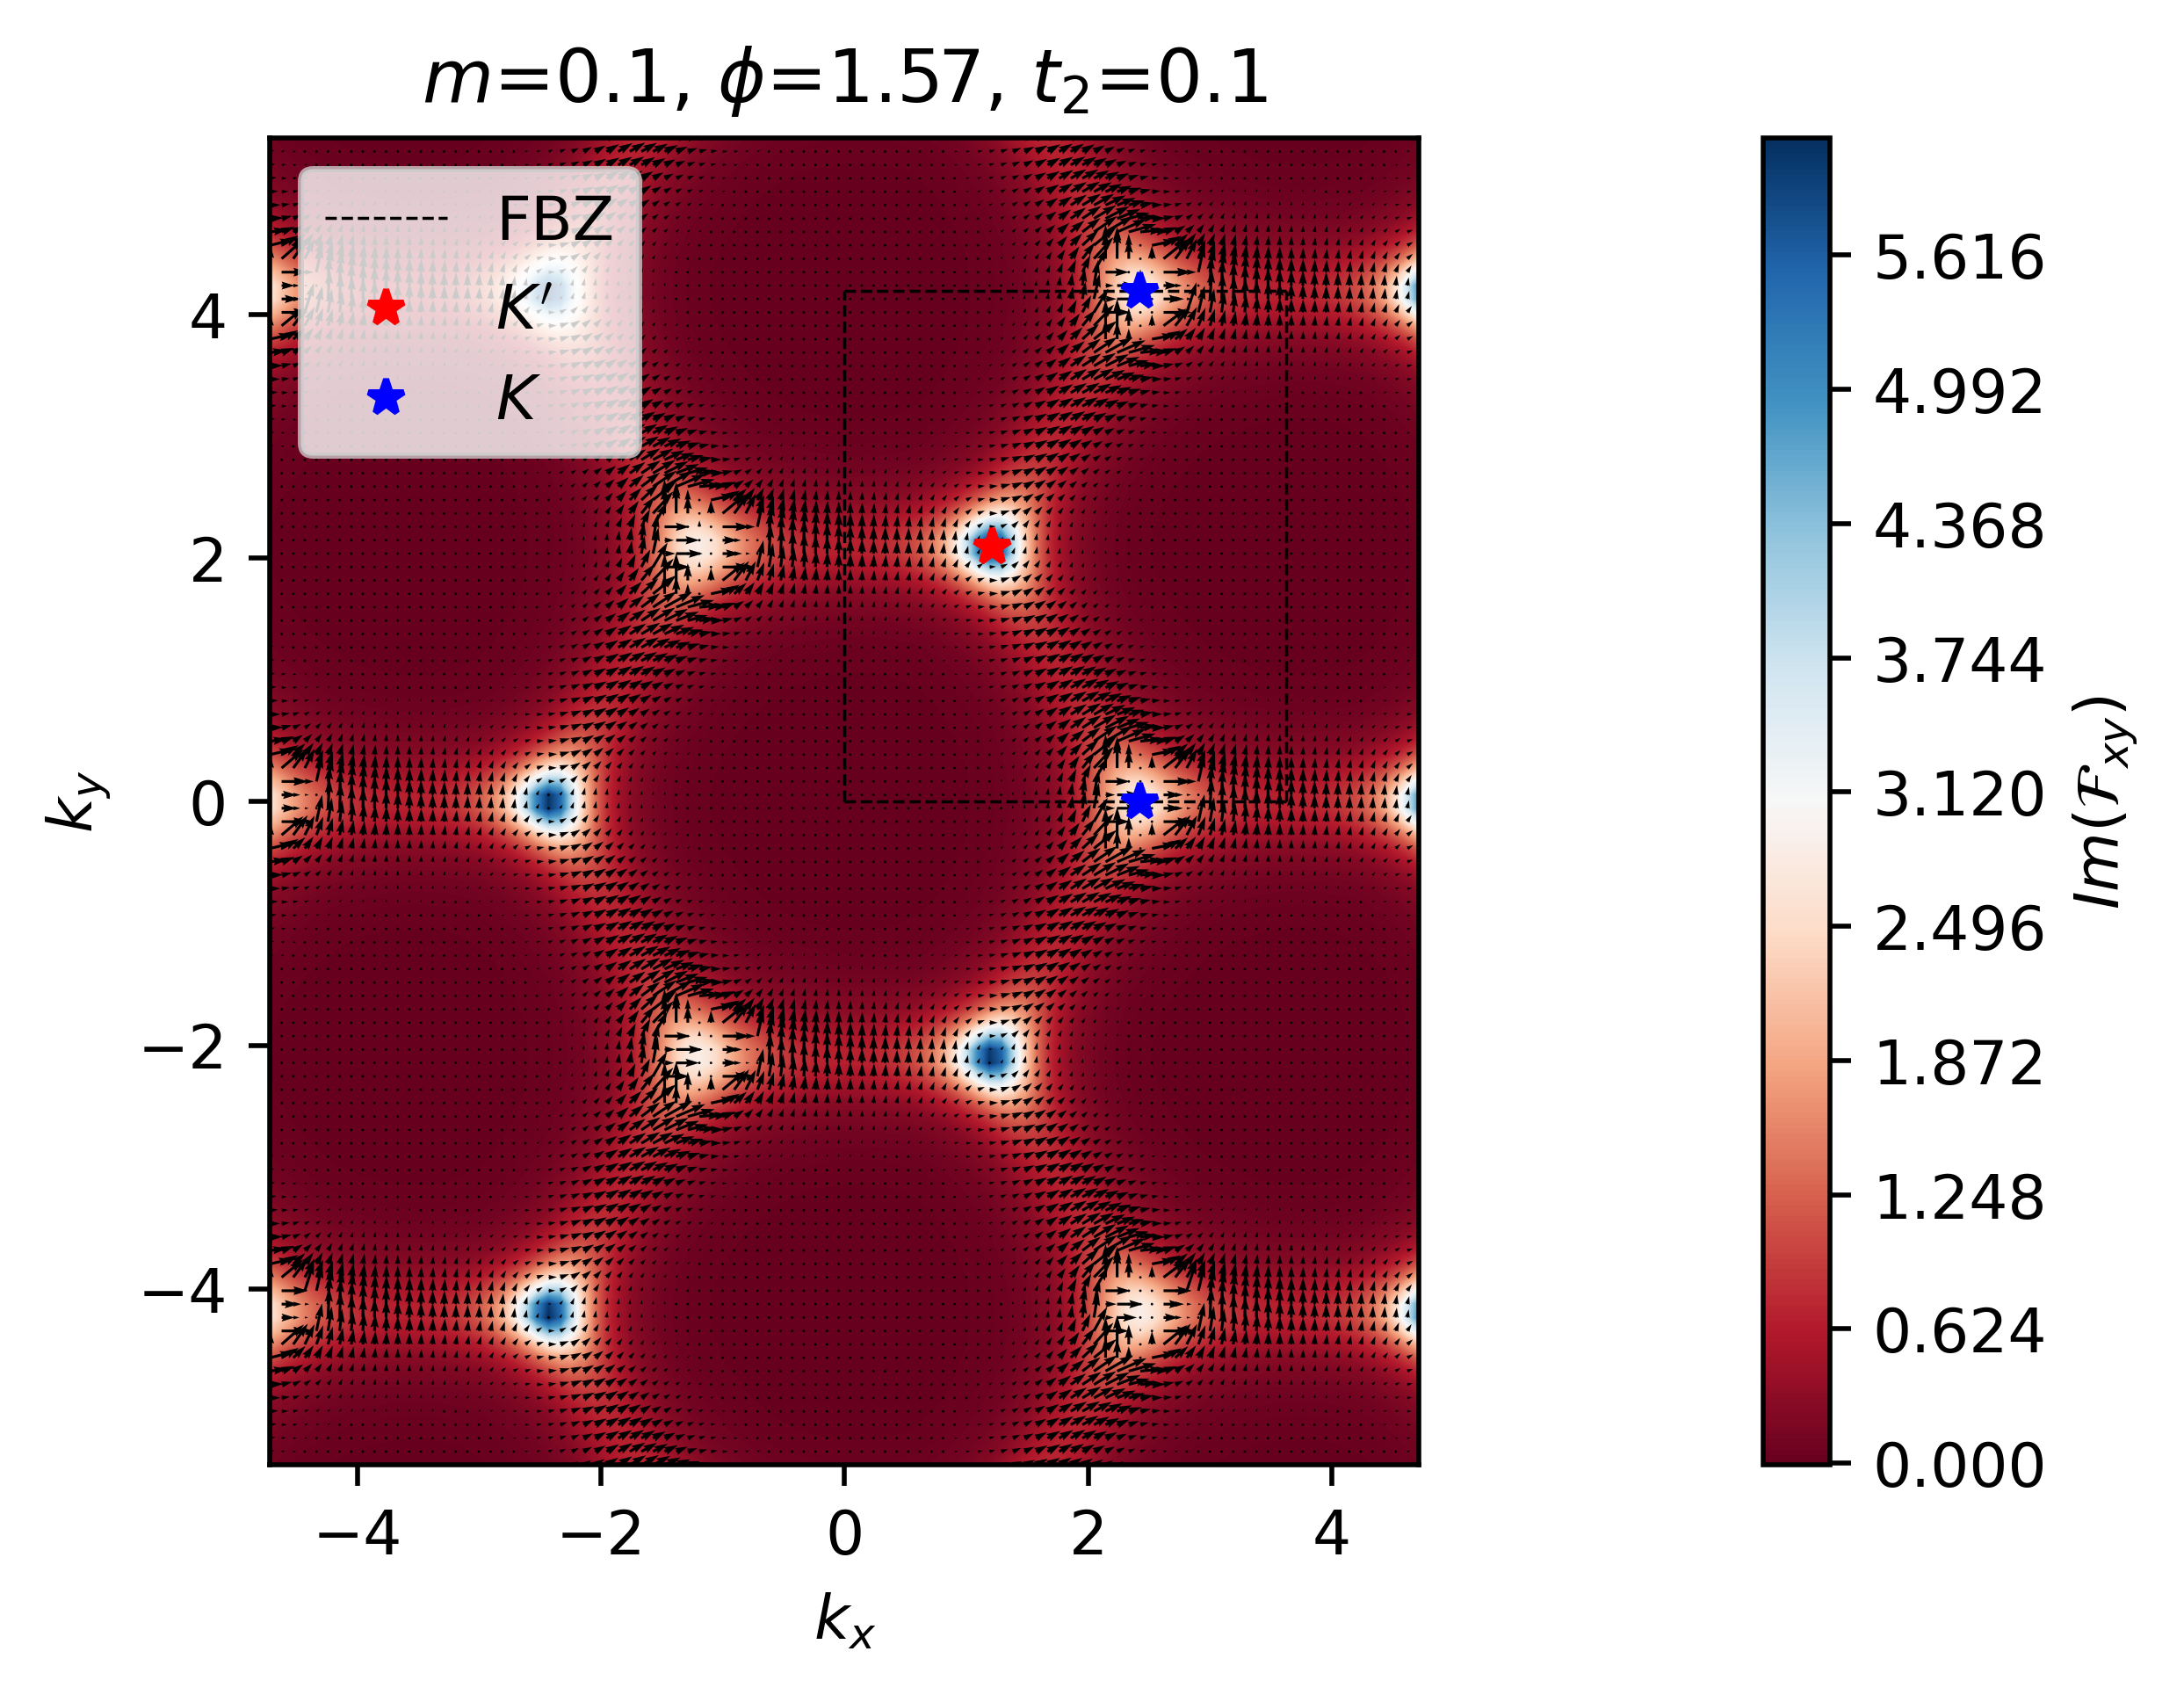

The Chern number is:(0.9082943445275908-2.5870250414337934e-17j)


In [22]:
plot_Berry_curvature(0.1,np.pi/2,0.1,[-1.3*kx_max,1.3*kx_max],[-1.3*ky_max,1.3*ky_max])